# Ciencia de Datos

## UTN FRBA - Ingeniería Industrial

### Trabajo Práctico Final - 2020

### Autores:

- De Luca, Germán - Leg. nº: 159.856-9
- Dobzewicz, Kevin - Leg. nº: 159.047-9
- Rodriguez Piro, Juan Dario - Leg. nº: 159.005-4

In [1]:

#Librerias generales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias para pre-procesamiento
from sklearn import preprocessing

#PCA
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.cm as cm

#Clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.metrics import silhouette_score



In [2]:
#Importar "resultado-de-encuestas-2016" Formato CSV
#Link a dataser https://data.buenosaires.gob.ar/dataset/encuesta-centros-atencion-turistica-cat/archivo/juqdkmgo-941-resource
ds2016 = pd.read_csv(r"resultado-de-encuestas-2016.csv", delimiter=';',na_values="null")
ds2017 = pd.read_csv(r"resultado-de-encuestas-2017-2018.csv", delimiter=',',na_values="null")

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Pre-procesamiento de datos

In [3]:
ds2016.head(2)

,X,Y,ID,FECHA,CAT,DIRECCION,BARRIO,COMUNA,PASAJEROS,PERNOCTACIONES,...,SALUD,TANGO,VISITAS_GUIADAS,ESTUDIANTE_EXTRANJERO,CONSULTA_DE_PASAJERO_EN_TRANSITO,SUBE,APPS,SURF_URBANO,USO_DE_INSTALACIONES,CANT_DE_MOTIVOS
0,"-58,412118","-34,571635",1,14/06/2016,PLANETARIO,AV. SARMIENTO Y AV. FIGUEROA ALCORTA,PALERMO,COMUNA 14,2,7,...,0,0,0,0,0,0,0,0,0,2
1,"-58,412118","-34,571635",2,14/06/2016,PLANETARIO,AV. SARMIENTO Y AV. FIGUEROA ALCORTA,PALERMO,COMUNA 14,2,15,...,0,0,0,0,0,0,0,0,0,1


In [4]:
ds2016.columns

Index(['X', 'Y', 'ID', 'FECHA', 'CAT', 'DIRECCION', 'BARRIO', 'COMUNA',
       'PASAJEROS', 'PERNOCTACIONES', 'ARGENTINA', 'PAIS_EXT', 'ACCESIBILIDAD',
       'AGENCIAS_COMPAÑIAS_AEREAS', 'AGENDA_CULTURAL', 'ALOJAMIENTO',
       'ALREDEDORES_BA', 'ARTE_Y_ARQUITECTURA', 'ATRACTIVOS_TURISTICOS',
       'CAMBIO_BANCO_CAJEROS', 'BARRIOS', 'BICICLETAS', 'BUS_TURISTICO',
       'COMPRAS', 'DEPORTES', 'EVENTOS_ESPECTACULOS', 'FERIAS_MERCADOS',
       'GASTRONOMIA', 'GUIAS_TEMATICAS', 'INFO_ARGENTINA', 'INFO_URUGUAY',
       'LGBTIQ', 'LITERARIO', 'MAPAS_CIUDAD', 'MUSEOS', 'NIÑOS',
       'VIDA_NOCTURNA', 'ORGANISMOS_OFICIALES', 'ORIENTACION_TRANSPORTE',
       'OTROS', 'PARQUES', 'QUE_HACER_EN_BA', 'RELIGIOSO', 'SALUD', 'TANGO',
       'VISITAS_GUIADAS', 'ESTUDIANTE_EXTRANJERO',
       'CONSULTA_DE_PASAJERO_EN_TRANSITO', 'SUBE', 'APPS', 'SURF_URBANO',
       'USO_DE_INSTALACIONES', 'CANT_DE_MOTIVOS'],
      dtype='object')

In [5]:
#Cambiamos el nombre de las columnas que nos interesan para que coincidan los datasets de 2016 y 2017-2018
ds2016.columns = ['X', 'Y', 'ID', 'FECHA', 'CAT', 'DIRECCION', 'BARRIO', 'COMUNA',
       'PASAJEROS', 'PERNOCTACIONES', 'PROVINCIA', 'PAIS', 'ACCESIBILIDAD',
       'AGENCIAS_COMPAÑIAS_AEREAS', 'AGENDA_CULTURAL', 'ALOJAMIENTO',
       'ALREDEDORES_BA', 'ARTE_Y_ARQUITECTURA', 'ATRACTIVOS_TURISTICOS',
       'CAMBIO_BANCO_CAJEROS', 'BARRIOS', 'BICICLETAS', 'BUS_TURISTICO',
       'COMPRAS', 'DEPORTES', 'EVENTOS_ESPECTACULOS', 'FERIAS_MERCADOS',
       'GASTRONOMIA', 'GUIAS_TEMATICAS', 'INFO_ARGENTINA', 'INFO_URUGUAY',
       'LGBTIQ', 'LITERARIO', 'MAPAS_CIUDAD', 'MUSEOS', 'NIÑOS',
       'VIDA_NOCTURNA', 'ORGANISMOS_OFICIALES', 'ORIENTACION_TRANSPORTE',
       'OTROS', 'PARQUES', 'QUE_HACER_EN_BA', 'RELIGIOSO', 'SALUD', 'TANGO',
       'VISITAS_GUIADAS', 'ESTUDIANTE_EXTRANJERO',
       'CONSULTA_DE_PASAJERO_EN_TRANSITO', 'SUBE', 'APPS', 'SURF_URBANO',
       'USO_DE_INSTALACIONES', 'CANT_DE_MOTIVOS']

In [6]:
#El dataset original espacio en blanco en la columna "PAIS" cuando la columna "PROVINCIA" tiene un valor.
#Vamos a reemplazar esos espacios en blanco por "ARGENTINA" para tener todo en una misma columna.
ds2016['PAIS'].replace(' ', "ARGENTINA", inplace = True )
ds2016[['PAIS','PROVINCIA']].head(5)

,PAIS,PROVINCIA
0,REINO UNIDO,
1,ESTADOS UNIDOS,
2,ESTADOS UNIDOS,
3,ARGENTINA,MENDOZA
4,ARGENTINA,CORDOBA


In [7]:
ds2017.head(2)

,id,fecha,centro_atencion_turistica,barrio,comuna,pasajeros,pais_residencia_si_extranjero,otro_pais_residencia_si_extranjero,provincia_residencia_si_argentino,pernoctaciones,medio_transporte_llegada,alojamiento,otro_alojamiento,barrio.1,otro_barrio,primera_vez,motivo_viaje,otro_motivo_viaje,motivo_consulta,otro_motivo_consulta
0,1,2017-01-02,retiro,RETIRO,COMUNA 1,2,Chile,NaN,NaN,7.0,No especifica,NaN,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion alojamiento,NaN
1,2,2017-01-02,retiro,RETIRO,COMUNA 1,1,NaN,NaN,Provincia de Buenos Aires,2.0,No especifica,NaN,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion,NaN


In [8]:
ds2017.columns

Index(['id', 'fecha', 'centro_atencion_turistica', 'barrio', 'comuna',
       'pasajeros', 'pais_residencia_si_extranjero',
       'otro_pais_residencia_si_extranjero',
       'provincia_residencia_si_argentino', 'pernoctaciones',
       'medio_transporte_llegada', 'alojamiento', 'otro_alojamiento',
       'barrio.1', 'otro_barrio', 'primera_vez', 'motivo_viaje',
       'otro_motivo_viaje', 'motivo_consulta', 'otro_motivo_consulta'],
      dtype='object')

In [9]:
#Cambiamos el nombre de las columnas que nos interesan para que coincidan los datasets de 2016 y 2017-2018
ds2017.columns = ['ID', 'FECHA', 'CAT', 'BARRIO', 'COMUNA',
       'PASAJEROS', 'PAIS',
       'otro_pais_residencia_si_extranjero',
       'PROVINCIA', 'PERNOCTACIONES',
       'medio_transporte_llegada', 'ALOJAMIENTO', 'otro_alojamiento',
       'barrio.1', 'otro_barrio', 'primera_vez', 'motivo_viaje',
       'otro_motivo_viaje', 'motivo_consulta', 'otro_motivo_consulta']


In [10]:
#El dataset original espacio en blanco en la columna "PAIS" cuando la columna "PROVINCIA" tiene un valor.
#Vamos a reemplazar esos espacios en blanco por "ARGENTINA" para tener todo en una misma columna.
ds2017['PAIS'].replace(np.nan, "ARGENTINA", inplace = True )
ds2017[['PAIS','PROVINCIA']].head(5)

,PAIS,PROVINCIA
0,Chile,NaN
1,ARGENTINA,Provincia de Buenos Aires
2,ARGENTINA,Córdoba
3,Francia,NaN
4,México,NaN


In [11]:
#Reescribimos el texto dentro del dataset de 2017-2018 en mayúscula para que coincida con el de 2016.
ds2017 = ds2017.apply(lambda x: x.str.upper() if (type(x)==object) else x)
ds2017.head(5)

,ID,FECHA,CAT,BARRIO,COMUNA,PASAJEROS,PAIS,otro_pais_residencia_si_extranjero,PROVINCIA,PERNOCTACIONES,medio_transporte_llegada,ALOJAMIENTO,otro_alojamiento,barrio.1,otro_barrio,primera_vez,motivo_viaje,otro_motivo_viaje,motivo_consulta,otro_motivo_consulta
0,1,2017-01-02,retiro,RETIRO,COMUNA 1,2,Chile,NaN,NaN,7.0,No especifica,NaN,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion alojamiento,NaN
1,2,2017-01-02,retiro,RETIRO,COMUNA 1,1,ARGENTINA,NaN,Provincia de Buenos Aires,2.0,No especifica,NaN,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion,NaN
2,3,2017-01-02,retiro,RETIRO,COMUNA 1,2,ARGENTINA,NaN,Córdoba,0.0,No especifica,No pernocta en Buenos Aires,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion alrededores,NaN
3,4,2017-01-02,retiro,RETIRO,COMUNA 1,2,Francia,NaN,NaN,4.0,No especifica,NaN,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion,NaN
4,5,2017-01-02,retiro,RETIRO,COMUNA 1,1,México,NaN,NaN,0.0,No especifica,No pernocta en Buenos Aires,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion alrededores,NaN


In [12]:
#Se ponen las columans del dataset 2017 en mayúscula para hacerlo compatible con el 2016
ds2017['PAIS']=ds2017['PAIS'].str.upper()
ds2017['CAT']=ds2017['CAT'].str.upper()
ds2017['PROVINCIA']=ds2017['PROVINCIA'].str.upper()
ds2017['COMUNA']=ds2017['COMUNA'].str.upper()
ds2017.head(5)

,ID,FECHA,CAT,BARRIO,COMUNA,PASAJEROS,PAIS,otro_pais_residencia_si_extranjero,PROVINCIA,PERNOCTACIONES,medio_transporte_llegada,ALOJAMIENTO,otro_alojamiento,barrio.1,otro_barrio,primera_vez,motivo_viaje,otro_motivo_viaje,motivo_consulta,otro_motivo_consulta
0,1,2017-01-02,RETIRO,RETIRO,COMUNA 1,2,CHILE,NaN,NaN,7.0,No especifica,NaN,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion alojamiento,NaN
1,2,2017-01-02,RETIRO,RETIRO,COMUNA 1,1,ARGENTINA,NaN,PROVINCIA DE BUENOS AIRES,2.0,No especifica,NaN,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion,NaN
2,3,2017-01-02,RETIRO,RETIRO,COMUNA 1,2,ARGENTINA,NaN,CÓRDOBA,0.0,No especifica,No pernocta en Buenos Aires,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion alrededores,NaN
3,4,2017-01-02,RETIRO,RETIRO,COMUNA 1,2,FRANCIA,NaN,NaN,4.0,No especifica,NaN,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion,NaN
4,5,2017-01-02,RETIRO,RETIRO,COMUNA 1,1,MÉXICO,NaN,NaN,0.0,No especifica,No pernocta en Buenos Aires,NaN,NaN,NaN,No especifica,No especifica,NaN,Mapas Orientacion alrededores,NaN


In [13]:
#Reemplazamos los espacios en "PROVINCIA" por NaNs
ds2017['PROVINCIA'].replace(' ',np.nan, inplace = False )
ds2017[['PAIS','PROVINCIA']].head(5)

,PAIS,PROVINCIA
0,CHILE,NaN
1,ARGENTINA,PROVINCIA DE BUENOS AIRES
2,ARGENTINA,CÓRDOBA
3,FRANCIA,NaN
4,MÉXICO,NaN


In [14]:
ext_unique = len(ds2016['CAT'].unique()) # Cantidad de valores unicos en 'Installs'

print(f'En total hay {ext_unique} tipos de valores en la columna "barrio.1"\r\n\n')
print("Estos son los diferente tipos:\n\n", ds2016['CAT'].unique())

En total hay 9 tipos de valores en la columna "barrio.1"


Estos son los diferente tipos:

 ['PLANETARIO' 'CAMINITO' 'RETIRO' 'RECOLETA' 'PLAZA SAN MARTIN'
 'PUERTO MADERO' 'FLORIDA' 'AEROPARQUE' 'HUB']


In [15]:
ext_unique1 = len(ds2017['CAT'].unique()) # Cantidad de valores unicos en 'Installs'

print(f'En total hay {ext_unique1} tipos de valores en la columna "barrio.1"\r\n\n')
print("Estos son los diferente tipos:\n\n", ds2017['CAT'].unique())

En total hay 40 tipos de valores en la columna "barrio.1"


Estos son los diferente tipos:

 ['RETIRO' 'FLORIDA2' 'RECOLETA2' 'PUERTOMADERO2' 'HUB2' 'CAMINITO'
 'AEROPARQUE2' 'PLANETARIO2' 'PLANETARIO' 'CAMINITO2' 'PUERTOMADERO'
 'RETIRO2' 'RECOLETA' 'FLORIDA' 'AEROPARQUE' 'HUB' 'PZASANMARTIN' nan
 'FLORIDA (UNAUTHENTICATED)' 'PLANETARIO (UNAUTHENTICATED)'
 'HUB2 (AUTHENTICATED AS NULL)' 'RETIRO (UNAUTHENTICATED)'
 'CAMINITO (AUTHENTICATED AS NULL)' 'PZASANMARTIN (UNAUTHENTICATED)'
 'RECOLETA (AUTHENTICATED AS NULL)' 'FLORIDA (AUTHENTICATED AS NULL)'
 'HUB2 (UNAUTHENTICATED)' 'CAMINITO (UNAUTHENTICATED)'
 'RECOLETA (UNAUTHENTICATED)' 'PUERTOMADERO (UNAUTHENTICATED)'
 'PUERTOMADERO (AUTHENTICATED AS NULL)'
 'PLANETARIO (AUTHENTICATED AS NULL)'
 'PZASANMARTIN (AUTHENTICATED AS NULL)'
 'AEROPARQUE (AUTHENTICATED AS NULL)'
 'CASCO HIST├│RICO (AUTHENTICATED AS RETIRO)' 'CASCO HIST├│RICO'
 'RETIRO (AUTHENTICATED AS AEROPARQUE)' 'RETIRO (AUTHENTICATED AS NULL)'
 ' (UNAUTHENTICATED)' 'AEROPARQ

In [16]:
ds2017["CAT2"] = ds2017["CAT"]
ds2017["CAT2"] = ds2017["CAT2"].replace(['PLANETARIO.*','CAMINITO.*','RETIRO.*','RECOLETA.*','PZA.*',
                                         'PUERTO.*','FLORIDA.*','AEROPARQUE.*','HUB.*','CAS.*'],
                                        ['PLANETARIO','CAMINITO','RETIRO','RECOLETA','PLAZA SAN MARTIN',
                                         'PUERTO MADERO','FLORIDA','AEROPARQUE','HUB','RETIRO'], regex=True)


ext_unique2 = len(ds2017['CAT2'].unique()) # Cantidad de valores unicos en 'Installs'

print(f'En total hay {ext_unique2} tipos de valores en la columna "CAT"\r\n\n')
print("Estos son los diferente tipos:\n\n", ds2017['CAT2'].unique())


En total hay 11 tipos de valores en la columna "CAT"


Estos son los diferente tipos:

 ['RETIRO' 'FLORIDA' 'RECOLETA' 'PUERTO MADERO' 'HUB' 'CAMINITO'
 'AEROPARQUE' 'PLANETARIO' 'PLAZA SAN MARTIN' nan ' (UNAUTHENTICATED)']


In [17]:
ds2017['CAT2'] = ds2017['CAT2'].replace(' (UNAUTHENTICATED)', np.nan)
ext_unique3 = len(ds2017['CAT2'].unique()) # Cantidad de valores unicos en 'Installs'

print(f'En total hay {ext_unique3} tipos de valores en la columna "CAT"\r\n\n')
print("Estos son los diferente tipos:\n\n", ds2017['CAT2'].unique())

En total hay 10 tipos de valores en la columna "CAT"


Estos son los diferente tipos:

 ['RETIRO' 'FLORIDA' 'RECOLETA' 'PUERTO MADERO' 'HUB' 'CAMINITO'
 'AEROPARQUE' 'PLANETARIO' 'PLAZA SAN MARTIN' nan]


In [18]:
# Cantidad de valores nulos ordenados descendentemente
total = ds2017.isna().sum().sort_values(ascending=False)
# Porcetaje de lo que representa para cada columna
percent = (ds2017.isna().sum()/ds2017.isnull().count()).sort_values(ascending=False)
# Mostramos los 2 resultados en conjunto.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
otro_alojamiento,174713,0.999434
otro_motivo_viaje,174664,0.999153
otro_barrio,174543,0.998461
otro_motivo_consulta,173464,0.992289
otro_pais_residencia_si_extranjero,171795,0.982741
barrio.1,164158,0.939055
PROVINCIA,101677,0.581636
PERNOCTACIONES,87193,0.498782
ALOJAMIENTO,72817,0.416545
motivo_viaje,13659,0.078135


In [19]:
ds2017.dropna(subset=["CAT2"], inplace=True)
# Cantidad de valores nulos ordenados descendentemente
total = ds2017.isna().sum().sort_values(ascending=False)
# Porcetaje de lo que representa para cada columna
percent = (ds2017.isna().sum()/ds2017.isnull().count()).sort_values(ascending=False)
# Mostramos los 2 resultados en conjunto.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
otro_alojamiento,174706,0.999434
otro_motivo_viaje,174657,0.999153
otro_barrio,174536,0.998461
otro_motivo_consulta,173457,0.992289
otro_pais_residencia_si_extranjero,171788,0.982741
barrio.1,164151,0.939052
PROVINCIA,101672,0.581631
PERNOCTACIONES,87189,0.498779
ALOJAMIENTO,72814,0.416544
motivo_viaje,13659,0.078138


In [20]:
ext_unique4 = len(ds2017['CAT2'].unique()) # Cantidad de valores unicos en 'Installs'

print(f'En total hay {ext_unique4} tipos de valores en la columna "CAT"\r\n\n')
print("Estos son los diferente tipos:\n\n", ds2017['CAT2'].unique())

En total hay 9 tipos de valores en la columna "CAT"


Estos son los diferente tipos:

 ['RETIRO' 'FLORIDA' 'RECOLETA' 'PUERTO MADERO' 'HUB' 'CAMINITO'
 'AEROPARQUE' 'PLANETARIO' 'PLAZA SAN MARTIN']


In [21]:
#Quitamos las tildes
ds2017[['PROVINCIA', 'PAIS']]=ds2017[['PROVINCIA', 'PAIS']].replace(['Á','É','Í','Ó','Ú'],
                                        ['A','E','I','O','U'], regex=True )
ds2017[['PAIS','PROVINCIA']].head(5)

,PAIS,PROVINCIA
0,CHILE,NaN
1,ARGENTINA,PROVINCIA DE BUENOS AIRES
2,ARGENTINA,CORDOBA
3,FRANCIA,NaN
4,MEXICO,NaN


### Creación de los datasets que vammos a usar
Creamos los datasets de 2016, 2017 y 2018 con las columnas que vamos a usar de los datasets originales.

Vamos a usar las columnas :
- FECHA
- CAT
- PASAJEROS
- PERNOCTACIONES
- PROVINCIA
- PAIS

In [22]:
ds2016ok = pd.DataFrame(ds2016[['FECHA','CAT','PASAJEROS','PERNOCTACIONES','PAIS','PROVINCIA']])
print(ds2016ok.shape)
ds2016ok.head(5)

(106942, 6)


,FECHA,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA
0,14/06/2016,PLANETARIO,2,7,REINO UNIDO,
1,14/06/2016,PLANETARIO,2,15,ESTADOS UNIDOS,
2,14/06/2016,PLANETARIO,2,8,ESTADOS UNIDOS,
3,14/06/2016,PLANETARIO,5,7,ARGENTINA,MENDOZA
4,14/06/2016,PLANETARIO,2,3,ARGENTINA,CORDOBA


In [23]:
ds2017ok = pd.DataFrame(ds2017[['FECHA','CAT2','PASAJEROS','PERNOCTACIONES','PAIS','PROVINCIA']])
print(ds2017ok.shape)
ds2017ok.head(5)

(174805, 6)


,FECHA,CAT2,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA
0,2017-01-02,RETIRO,2,7.0,CHILE,NaN
1,2017-01-02,RETIRO,1,2.0,ARGENTINA,PROVINCIA DE BUENOS AIRES
2,2017-01-02,RETIRO,2,0.0,ARGENTINA,CORDOBA
3,2017-01-02,RETIRO,2,4.0,FRANCIA,NaN
4,2017-01-02,RETIRO,1,0.0,MEXICO,NaN


In [24]:
ds2017ok.columns = ['FECHA','CAT','PASAJEROS','PERNOCTACIONES','PAIS','PROVINCIA']
ds2017ok.head(2)

,FECHA,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA
0,2017-01-02,RETIRO,2,7.0,CHILE,NaN
1,2017-01-02,RETIRO,1,2.0,ARGENTINA,PROVINCIA DE BUENOS AIRES


### Los datasets que vamos a usar son ds2016ok y ds2017ok

In [25]:
#unimos los dataframes
dsok = pd.concat([ds2016ok, ds2017ok])
print(dsok.shape)
dsok.head()

(281747, 6)


,FECHA,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA
0,14/06/2016,PLANETARIO,2,7,REINO UNIDO,
1,14/06/2016,PLANETARIO,2,15,ESTADOS UNIDOS,
2,14/06/2016,PLANETARIO,2,8,ESTADOS UNIDOS,
3,14/06/2016,PLANETARIO,5,7,ARGENTINA,MENDOZA
4,14/06/2016,PLANETARIO,2,3,ARGENTINA,CORDOBA


In [26]:
#dsok.columns = ['indice_tiempo','CAT','PASAJEROS','PERNOCTACIONES','PAIS','PROVINCIA']
#dsok.head(2)

In [27]:
#Importamos un dataset de tipo de cambio para tener otra feature en el modelo
dolar = pd.read_csv('datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria (1).csv')

In [28]:
dolar.head(5)

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
0,2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
dolar['tipo_cambio_a3500'].isnull().sum()

0

In [30]:
dolar_ok = pd.DataFrame(dolar[['indice_tiempo','tipo_cambio_a3500']])
print(dolar_ok.shape)
dolar_ok.tail()

(6724, 2)


,indice_tiempo,tipo_cambio_a3500
6719,2020-07-27,72.075
6720,2020-07-28,72.135
6721,2020-07-29,72.195
6722,2020-07-30,72.255
6723,2020-07-31,72.315


In [31]:
dolar_ok.isnull().sum()

indice_tiempo        0
tipo_cambio_a3500    0
dtype: int64

In [32]:
#transformo fecha
dolar_ok['FECHA'] = pd.to_datetime(dolar_ok.indice_tiempo)
dolar_ok =dolar_ok.drop(['indice_tiempo'], axis=1)
dolar_ok.head(2)

,tipo_cambio_a3500,FECHA
0,1.9917,2002-03-05
1,2.0508,2002-03-06


In [33]:
#fecha transformada
dsok['FECHA'] = pd.to_datetime(dsok.FECHA) 
dsok.head(2)

,FECHA,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA
0,2016-06-14,PLANETARIO,2,7,REINO UNIDO,
1,2016-06-14,PLANETARIO,2,15,ESTADOS UNIDOS,


In [34]:
#Combino el dataset del dolar o dsok usando FECHA como key
dsok2 = pd.merge(dolar_ok, dsok, on='FECHA')
print(dsok2.shape)
dsok2.head()

(281747, 7)


,tipo_cambio_a3500,FECHA,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA
0,13.005,2016-01-02,RECOLETA,2,3,ESTADOS UNIDOS,
1,13.005,2016-01-02,RECOLETA,2,2,ARGENTINA,SANTA FE
2,13.005,2016-01-02,RECOLETA,3,4,BRASIL,
3,13.005,2016-01-02,RECOLETA,4,7,REINO UNIDO,
4,13.005,2016-01-02,RECOLETA,2,3,REINO UNIDO,


In [35]:
dsok2["PROVINCIA"].unique()

array([' ', 'SANTA FE', 'BUENOS AIRES', 'CIUDAD DE BUENOS AIRES',
       'MENDOZA', 'CORDOBA', 'SALTA', 'CORRIENTES', 'SANTA CRUZ',
       'SAN JUAN', 'TIERRA DEL FUEGO', 'FORMOSA', 'CHUBUT', 'MISIONES',
       'CHACO', 'NEUQUEN', 'SANTIAGO DEL ESTERO', 'TUCUMAN', 'JUJUY',
       'ENTRE RIOS', 'CATAMARCA', 'SAN LUIS', 'RIO NEGRO', 'LA RIOJA',
       'LA PAMPA', 'NO INFORMO PROVINCIA', nan,
       'PROVINCIA DE BUENOS AIRES', 'AMBA'], dtype=object)

In [36]:
##Se busca cuantos de los registros son "No informo provincia" y se eliminan ya que son 6
dsok2.drop(dsok2.loc[dsok2["PROVINCIA"]=='NO INFORMO PROVINCIA'].index, inplace=True)

##Se asignan los registros de Provincia de Buenos Aires y AMBA a Buenos aires y los vacios se completan con la palabra NA.
dsok2["PROVINCIA"] = dsok2["PROVINCIA"].replace([ 'PROVINCIA DE BUENOS AIRES', 'AMBA','^ '],['BUENOS AIRES','BUENOS AIRES', 'NA'], regex=True)
dsok2["PROVINCIA"] = dsok2["PROVINCIA"].replace(np.nan, 'NA')

dsok2["PROVINCIA"].unique()

array(['NA', 'SANTA FE', 'BUENOS AIRES', 'CIUDAD DE BUENOS AIRES',
       'MENDOZA', 'CORDOBA', 'SALTA', 'CORRIENTES', 'SANTA CRUZ',
       'SAN JUAN', 'TIERRA DEL FUEGO', 'FORMOSA', 'CHUBUT', 'MISIONES',
       'CHACO', 'NEUQUEN', 'SANTIAGO DEL ESTERO', 'TUCUMAN', 'JUJUY',
       'ENTRE RIOS', 'CATAMARCA', 'SAN LUIS', 'RIO NEGRO', 'LA RIOJA',
       'LA PAMPA'], dtype=object)

In [37]:
dsok2["PAIS"].unique()

array(['ESTADOS UNIDOS', 'ARGENTINA', 'BRASIL', 'REINO UNIDO', 'FRANCIA',
       'CHILE', 'MEXICO', 'VENEZUELA', 'ALEMANIA', 'SUIZA', 'PARAGUAY',
       'BOLIVIA', 'COLOMBIA', 'JAPON', 'ITALIA', 'PERU', 'CHINA', 'RUSIA',
       'MALASIA', 'ESPAÑA', 'AUSTRALIA', 'POLONIA', 'UCRANIA', 'URUGUAY',
       'INDIA', 'HUNGRIA', 'HOLANDA', 'SUECIA', 'TURQUIA', 'NORUEGA',
       'CANADA', 'ISRAEL', 'AUSTRIA', 'IRLANDA', 'BELGICA', 'EGIPTO',
       'COREA DEL SUR', 'PAISES BAJOS', 'ISLA DE MAN', 'LITUANIA',
       'FINLANDIA', 'BANGLADESH', 'ECUADOR', 'PORTUGAL', 'COSTA RICA',
       'NUEVA ZELANDA', 'SINGAPUR', 'INDONESIA', 'GUATEMALA',
       'REPUBLICA DOMINICANA', 'REPUBLICA CHECA', 'HONDURAS', 'CUBA',
       'DINAMARCA', 'MARRUECOS', 'PANAMA', 'BULGARIA', 'VIETNAM',
       'GRECIA', 'TAIWAN', 'CROACIA', 'SUDAFRICA', 'MALTA', 'ESLOVENIA',
       'FILIPINAS', 'SERBIA', 'RUMANIA', 'ALBANIA', 'EL SALVADOR',
       'PUERTO RICO', 'ESLOVAQUIA', 'SURINAM', 'UGANDA', 'TASMANIA',
       'ARMENIA', 'J

In [38]:
##Se busca cuantos de los registros son "OTRO PAIS DE RESIDENCIA SI ES EXTRANJERO" y se eliminan ya que no es representativo
dsok2.drop(dsok2.loc[dsok2["PAIS"]=='OTRO PAIS DE RESIDENCIA SI ES EXTRANJERO'].index, inplace=True)

In [39]:
##Se analizan los registros sin provincia los cuales no son Argentina
print (str(dsok2[dsok2['PROVINCIA']=='NA'].shape[0]-dsok2.loc[dsok2["PAIS"]!='ARGENTINA'].shape[0])+ ' registros sin provincia que no son Argentina')


1880 registros sin provincia que no son Argentina


In [40]:
##Se eliminan los registros
dsok2.drop(dsok2.loc[(dsok2["PAIS"]=='ARGENTINA') & (dsok2['PROVINCIA']=='NA')].index, inplace=True)

In [41]:
##Analizamos los registros de pernoctaciones
dsok3=dsok2
dsok3["PERNOCTACIONES"].unique()

array(['3', '2', '4', '7', 'NS/NC', '8', '1', '6', '10', '5', '60', '9',
       '14', '21', '90', '30', '11', '15', '20', '12', '18', '25', '35',
       '180', '120', '27', '0', '45', '17', '29', '13', '360', '150',
       '19', '89', '365', '40', '26', '23', '32', '46', '95', '240', '24',
       '37', '33', '28', '50', '22', '16', '42', '270', '149', '119',
       '100', '75', '31', '110', '59', '36', '53', '183', '49', '210',
       '179', '359', '55', '44', '160', '70', '84', '80', '200', '350',
       '48', '43', '299', '38', '51', 7.0, 2.0, 0.0, 4.0, nan, 10.0, 3.0,
       5.0, 6.0, 11.0, 15.0, 180.0, 8.0, 1.0, 9.0, 30.0, 20.0, 90.0, 14.0,
       200.0, 50.0, 25.0, 18.0, 32.0, 22.0, 12.0, 16.0, 365.0, 21.0, 28.0,
       555.0, 60.0, 120.0, 150.0, 100.0, 63.0, 29.0, 45.0, 360.0, 70.0,
       31.0, 13.0, 17.0, 40.0, 35.0, 366.0, 56.0, 36.0, 160.0, 260.0,
       250.0, 67.0, 37.0, 175.0, 129.0, 300.0, 153.0, 89.0, 155.0, 210.0,
       42.0, 240.0, 64.0, 44.0, 345.0, 126.0, 19.0, 80.0

In [42]:
##Se analizan los registros que no saben no contestan de las pernoctaciones
##Aquellas que son de Buenos Aires y CIUDAD DE BUENOS AIRES se asume un valor 0 haciendo referencia que viven en las cercanias
dsok3.loc[(dsok3["PROVINCIA"]=='CIUDAD DE BUENOS AIRES') & (dsok3['PERNOCTACIONES']=='NS/NC')].replace('NS/NC',0)
dsok3.loc[(dsok3["PROVINCIA"]=='BUENOS AIRES') & (dsok3['PERNOCTACIONES']=='NS/NC')].replace('NS/NC',0)

,tipo_cambio_a3500,FECHA,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA
674,13.0692,2016-01-04,PLAZA SAN MARTIN,2,0,ARGENTINA,BUENOS AIRES
770,13.0692,2016-01-04,FLORIDA,5,0,ARGENTINA,BUENOS AIRES
1053,13.9413,2016-01-07,PLAZA SAN MARTIN,1,0,ARGENTINA,BUENOS AIRES
1054,13.9413,2016-01-07,PLAZA SAN MARTIN,2,0,ARGENTINA,BUENOS AIRES
1172,13.9413,2016-01-07,PLANETARIO,1,0,ARGENTINA,BUENOS AIRES
...,...,...,...,...,...,...,...
106604,15.7333,2016-12-29,RECOLETA,4,0,ARGENTINA,BUENOS AIRES
106685,15.8502,2016-12-30,RECOLETA,2,0,ARGENTINA,BUENOS AIRES
106706,15.8502,2016-12-30,PLANETARIO,1,0,ARGENTINA,BUENOS AIRES
106745,15.8502,2016-12-30,HUB,5,0,ARGENTINA,BUENOS AIRES


In [43]:
dsok3['PERNOCTACIONES'].replace('NS/NC',np.NaN, inplace=True )
dsok3['PERNOCTACIONES'].replace(np.NaN,12345, inplace=True )
dsok3['PERNOCTACIONES'] = dsok3['PERNOCTACIONES'].astype(int)
dsok3['PERNOCTACIONES'].replace(12345,np.NaN, inplace=True )
dsok3["PERNOCTACIONES"] = dsok3.groupby("PAIS")["PERNOCTACIONES"].transform(
    lambda x: x.fillna(x.median()))

In [44]:
dsok3.loc[dsok3.PERNOCTACIONES.isna()]

,tipo_cambio_a3500,FECHA,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA
19072,15.3633,2016-03-09,FLORIDA,1,NaN,GUYANA,NA
77123,15.1607,2016-09-25,FLORIDA,1,NaN,BERMUDAS,NA
86119,15.1922,2016-10-25,AEROPARQUE,1,NaN,GUINEA ECUATORIAL,NA


In [45]:
#Solo hay un pasajero en dichos paises que no informan los pernoctaciones, se procede a eliminar dichos registros
dsok3=dsok3.drop([19072,77123,86119])

In [46]:
dsok3["PERNOCTACIONES"].unique()

array([  3. ,   2. ,   4. ,   7. ,   8. ,   1. ,   6. ,  10. ,   5. ,
        60. ,   9. ,  14. ,  21. ,  90. ,  30. ,  11. ,  15. ,  20. ,
        12. ,  18. ,  25. ,  35. , 180. , 120. ,  27. ,   0. ,  45. ,
        17. ,  29. ,  13. , 360. , 150. ,  19. ,  89. , 365. ,  40. ,
        26. ,  23. ,  32. ,  46. ,  95. , 240. ,  24. ,  37. ,  33. ,
        28. ,  50. ,  22. ,  16. ,  42. , 270. , 149. , 119. , 100. ,
         7.5,   3.5,  75. ,  31. ,   6.5,   4.5, 110. ,  59. ,  36. ,
        53. , 183. ,  49. , 210. , 179. , 359. ,  55. ,  44. , 160. ,
        70. ,  84. ,  80. , 200. , 350. ,  48. ,  43. , 299. ,  38. ,
        51. , 555. ,  63. , 366. ,  56. , 260. , 250. ,  67. , 175. ,
       129. , 300. , 153. , 155. ,  64. , 345. , 126. , 125. , 364. ,
       140. ,  99. ,  39. , 185. , 182. , 170. , 193. ,  34. , 255. ,
       165. , 186. , 157. , 190. , 286. , 217. , 198. , 172. , 158. ,
       335. , 354. , 690. , 121. ,  85. , 670. ,  68. ,  54. ])

In [47]:
dsok4=dsok3
dsok4

,tipo_cambio_a3500,FECHA,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA
0,13.0050,2016-01-02,RECOLETA,2,3.0,ESTADOS UNIDOS,NA
1,13.0050,2016-01-02,RECOLETA,2,2.0,ARGENTINA,SANTA FE
2,13.0050,2016-01-02,RECOLETA,3,4.0,BRASIL,NA
3,13.0050,2016-01-02,RECOLETA,4,7.0,REINO UNIDO,NA
4,13.0050,2016-01-02,RECOLETA,2,3.0,REINO UNIDO,NA
...,...,...,...,...,...,...,...
281742,27.3592,2018-07-25,HUB,5,6.0,ARGENTINA,LA RIOJA
281743,27.3592,2018-07-25,HUB,2,3.0,ARGENTINA,BUENOS AIRES
281744,27.3592,2018-07-25,HUB,3,3.0,ARGENTINA,BUENOS AIRES
281745,27.3592,2018-07-25,HUB,2,3.0,ARGENTINA,MISIONES


In [48]:
#dsok4=pd.get_dummies(data=dsok4, columns=['CAT'])

In [49]:
dsok4['DIA'] = dsok4['FECHA'].dt.day_name().astype(str)
dsok4['MES'] = dsok4['FECHA'].dt.month.astype(str)
dsok4.head()

,tipo_cambio_a3500,FECHA,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA,DIA,MES
0,13.005,2016-01-02,RECOLETA,2,3.0,ESTADOS UNIDOS,NA,Saturday,1
1,13.005,2016-01-02,RECOLETA,2,2.0,ARGENTINA,SANTA FE,Saturday,1
2,13.005,2016-01-02,RECOLETA,3,4.0,BRASIL,NA,Saturday,1
3,13.005,2016-01-02,RECOLETA,4,7.0,REINO UNIDO,NA,Saturday,1
4,13.005,2016-01-02,RECOLETA,2,3.0,REINO UNIDO,NA,Saturday,1


In [50]:
# LabelEncoder sirve para normalizar las labels entre 0 y n-clases y ademas transforma a numerico. 

# 1 - Primero creo un objeto (con determinados argumentos) que llama a la funcion que deseo
lePAIS = preprocessing.LabelEncoder()
lePROV = preprocessing.LabelEncoder()
leDAY = preprocessing.LabelEncoder()
leCAT = preprocessing.LabelEncoder()
# 2 - AL objeto le aplico la funcion fit a los datos desados, le pongo 0,1,2 a cada clase de planta, codifico
dsok4.PAIS=lePAIS.fit_transform(dsok4.PAIS)#.astype(str)
dsok4.PROVINCIA=lePROV.fit_transform(dsok4.PROVINCIA)#.astype(str)
dsok4.DIA = leDAY.fit_transform(dsok4.DIA).astype(str)
dsok4.CAT = leCAT.fit_transform(dsok4.CAT).astype(str)

dsok4.head()

,tipo_cambio_a3500,FECHA,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA,DIA,MES
0,13.005,2016-01-02,7,2,3.0,41,14,2,1
1,13.005,2016-01-02,7,2,2.0,6,21,2,1
2,13.005,2016-01-02,7,3,4.0,18,14,2,1
3,13.005,2016-01-02,7,4,7.0,97,14,2,1
4,13.005,2016-01-02,7,2,3.0,97,14,2,1


In [51]:
dsok5=dsok4

dsok5 = dsok5.drop('FECHA',axis=1)

print(dsok5.shape)
dsok5.head()

(276833, 8)


,tipo_cambio_a3500,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA,DIA,MES
0,13.005,7,2,3.0,41,14,2,1
1,13.005,7,2,2.0,6,21,2,1
2,13.005,7,3,4.0,18,14,2,1
3,13.005,7,4,7.0,97,14,2,1
4,13.005,7,2,3.0,97,14,2,1


## EDA

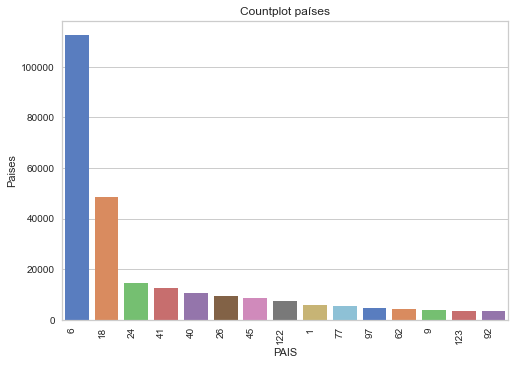

In [52]:
#Countplot de pais de origen
top = dsok3['PAIS'].value_counts().index[0:15]

ax = sns.countplot (dsok3.PAIS, palette = "muted",order=top)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Countplot países")
plt.ylabel('Paises')
plt.show()

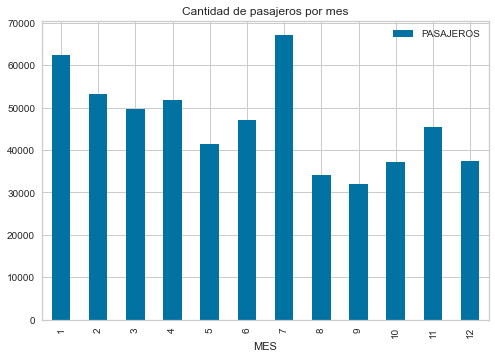

In [53]:
#Bar plot mes y pasajeros para ver cuando es que viene la mayor cantidad
PASAJEROS_POR_MES = pd.pivot_table(dsok4, values = 'PASAJEROS', columns = 'MES',fill_value=0, aggfunc = np.sum)
PASAJEROS_POR_MES=PASAJEROS_POR_MES.transpose()
PASAJEROS_POR_MES

PASAJEROS_POR_MES= PASAJEROS_POR_MES.transpose()[['1','2','3','4','5','6','7','8','9','10','11','12']].transpose()

PASAJEROS_POR_MES.plot(kind='bar',  title='Cantidad de pasajeros por mes')

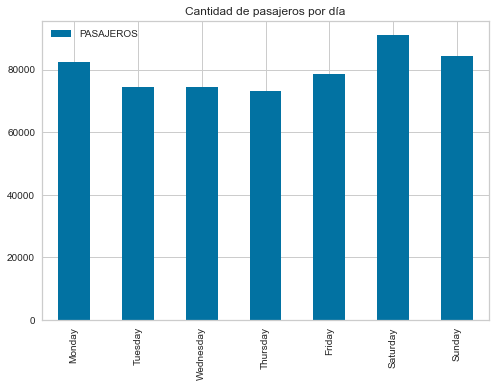

In [54]:
PASAJEROS_POR_DIA = pd.pivot_table(dsok4, values = 'PASAJEROS', columns = 'DIA',fill_value=0, aggfunc = np.sum)
PASAJEROS_POR_DIA=PASAJEROS_POR_DIA.transpose()
PASAJEROS_POR_DIA
PASAJEROS_POR_DIA.index=leDAY.inverse_transform(PASAJEROS_POR_DIA.index.astype(int))
PASAJEROS_POR_DIA=PASAJEROS_POR_DIA.transpose()
PASAJEROS_POR_DIA= PASAJEROS_POR_DIA[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
PASAJEROS_POR_DIA.transpose().plot(kind='bar', title='Cantidad de pasajeros por día')

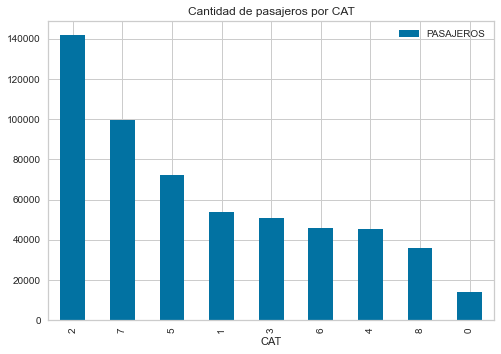

In [55]:
PASAJEROS_POR_CAT = pd.pivot_table(dsok3, values = 'PASAJEROS', columns = 'CAT',fill_value=0, aggfunc = np.sum)
PASAJEROS_POR_CAT=PASAJEROS_POR_CAT.transpose().sort_values(by=['PASAJEROS'], ascending=False)
PASAJEROS_POR_CAT

PASAJEROS_POR_CAT.plot(kind='bar', title='Cantidad de pasajeros por CAT')

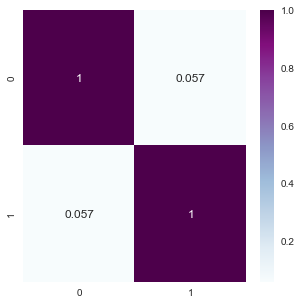

In [56]:
#Se analiza correlacion lineal entre tipo de cambio y cantidad de pasajeros
PASAJEROS_POR_DIA = pd.pivot_table(dsok3, values = 'PASAJEROS', columns = 'FECHA',fill_value=0, aggfunc = np.sum)
PASAJEROS_POR_DIA=PASAJEROS_POR_DIA.transpose()
PXD_D = pd.merge(dolar_ok, PASAJEROS_POR_DIA, on='FECHA')
PXD_D=PXD_D.drop('FECHA',axis=1)
PXD_D

r = np.corrcoef(PXD_D.tipo_cambio_a3500, PXD_D.PASAJEROS)
r

rdf = pd.DataFrame(r)
plt.figure(figsize = (5,5))
sns.heatmap(r, annot = True, cmap = "BuPu")
plt.show()

In [57]:
##No existe una correlación lineal entre la cantidad de pasajeros y el valor del dolar

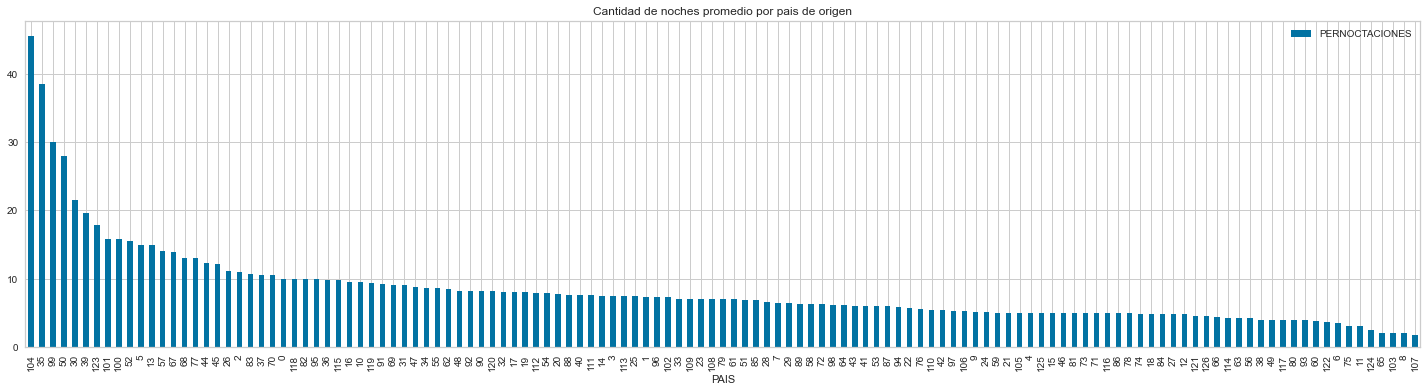

In [58]:
#Cantidad de pernoctaciones promedio según país de origen

PERNOCTACIONES_POR_PAIS = pd.pivot_table(dsok3, values = 'PERNOCTACIONES', columns = 'PAIS',fill_value=0, aggfunc = np.average)
PERNOCTACIONES_POR_PAIS=PERNOCTACIONES_POR_PAIS.transpose().sort_values(by=['PERNOCTACIONES'], ascending=False)
PERNOCTACIONES_POR_PAIS
PERNOCTACIONES_POR_PAIS.plot(kind='bar', title='Cantidad de noches promedio por pais de origen', figsize=(25,6), rot=90)
plt.show()

## Aplicación de modelo

- Visualización por PCA
- Clusterización con K - Means

In [59]:
scaler = preprocessing.MinMaxScaler().fit(dsok5)

In [60]:
scal = scaler.transform(dsok5)

In [61]:
# Generamos un PCA con los datos luego del autoscaling
n_comps = 2
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(scal))
eigenvalues = sklearn_pca.explained_variance_ratio_
eigenvalues.sum()
redon = round(eigenvalues.sum(),5)
print ("Las componentes explican un " +str(redon*100)+ " % de la variabilidad")

Las componentes explican un 44.801 % de la variabilidad


No handles with labels found to put in legend.


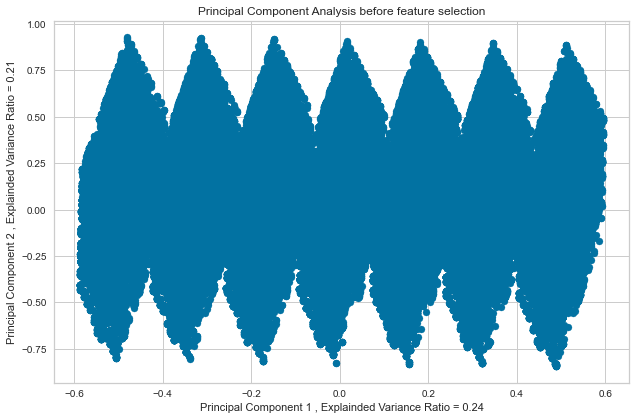

In [63]:
#Visualizaciión en componente principales
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], alpha = 0.999)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

D:\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
D:\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


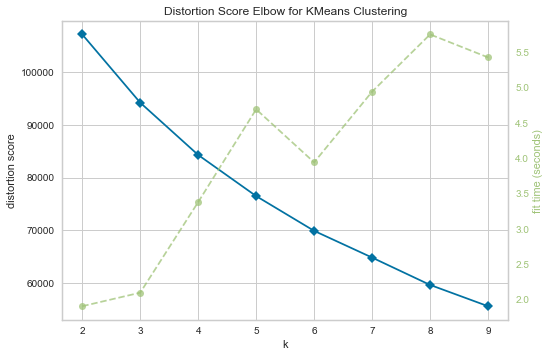

D:\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000250DD40AD00>,
                 k=None, model=None)

In [64]:
#Método elbow para encontrar el número de clusters

#Quick Method Fuente:https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
kelbow_visualizer(KMeans(random_state=4), scal, k=(2,10))

In [65]:
#Tomamos 4 clusters

In [66]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(scal)

In [67]:
np.shape(kmeans.labels_)
labels= pd.DataFrame(kmeans.labels_, columns=['CLUSTER'])

In [68]:
kmeans.cluster_centers_

array([[0.26540753, 0.521339  , 0.00780458, 0.00985013, 0.32044212,
        0.59876552, 0.1991409 , 0.44228351],
       [0.23142046, 0.57712448, 0.0065699 , 0.00840102, 0.23695712,
        0.47681876, 0.79138503, 0.17089898],
       [0.30508324, 0.45747686, 0.00568752, 0.00461454, 0.04762482,
        0.0590197 , 0.32221695, 0.42771077],
       [0.24740908, 0.49666754, 0.00690993, 0.00862824, 0.20668564,
        0.45973931, 0.7607306 , 0.78677794]])

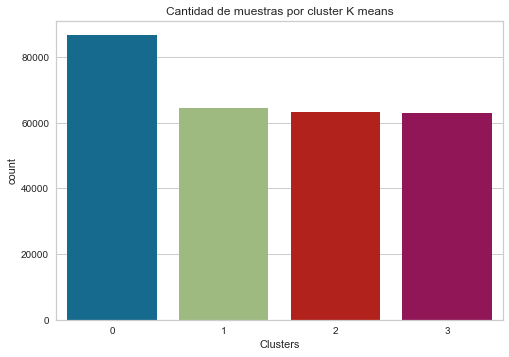

In [69]:
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

In [70]:
n_comps = 4
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(scal))
eigenvalues = sklearn_pca.explained_variance_ratio_

No handles with labels found to put in legend.


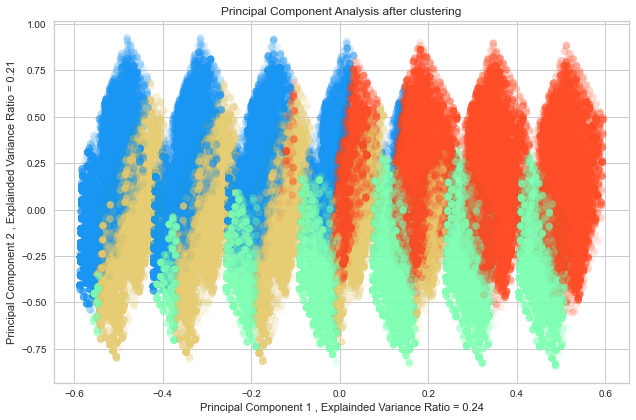

In [71]:
# plot PCA
y_pca = np.reshape(np.array(kmeans.labels_),(len(kmeans.labels_),1))
col = np.zeros((len(y_pca[:,0]),4))
for t in range(len(y_pca[:,0])):
    if y_pca[t,0]==1:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.2, 0.4, 1)),(4,))
    elif y_pca[t,0]==0: 
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.9, 0.6, 1)),(4,))
    elif y_pca[t,0]==2:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.5, 0.6, 1)),(4,))
    elif y_pca[t,0]==3:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.7, 0.6, 1)),(4,))
  

plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], c=col, alpha = 0.1)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis after clustering')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [72]:
sill_score = silhouette_score(scal,kmeans.labels_)
print(sill_score)

0.17211137754310502


In [73]:
print("El silhouette score es de "+str(sill_score))

El silhouette score es de 0.17211137754310502


## Análisis de clusters

In [74]:
dsok5.reset_index(drop=True, inplace=True)
dsok5

,tipo_cambio_a3500,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA,DIA,MES
0,13.0050,7,2,3.0,41,14,2,1
1,13.0050,7,2,2.0,6,21,2,1
2,13.0050,7,3,4.0,18,14,2,1
3,13.0050,7,4,7.0,97,14,2,1
4,13.0050,7,2,3.0,97,14,2,1
...,...,...,...,...,...,...,...,...
276828,27.3592,3,5,6.0,6,11,6,7
276829,27.3592,3,2,3.0,6,0,6,7
276830,27.3592,3,3,3.0,6,0,6,7
276831,27.3592,3,2,3.0,6,13,6,7


In [75]:
labels.reset_index(drop=True, inplace=True)
labels

,CLUSTER
0,1
1,0
2,1
3,0
4,0
...,...
276828,3
276829,3
276830,3
276831,3


In [76]:
dsok5 = dsok5.merge(labels, left_index=True, right_index=True)
dsok5

,tipo_cambio_a3500,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA,DIA,MES,CLUSTER
0,13.0050,7,2,3.0,41,14,2,1,1
1,13.0050,7,2,2.0,6,21,2,1,0
2,13.0050,7,3,4.0,18,14,2,1,1
3,13.0050,7,4,7.0,97,14,2,1,0
4,13.0050,7,2,3.0,97,14,2,1,0
...,...,...,...,...,...,...,...,...,...
276828,27.3592,3,5,6.0,6,11,6,7,3
276829,27.3592,3,2,3.0,6,0,6,7,3
276830,27.3592,3,3,3.0,6,0,6,7,3
276831,27.3592,3,2,3.0,6,13,6,7,3


In [77]:
dsok5.PAIS=lePAIS.inverse_transform(dsok4.PAIS)
dsok5.PROVINCIA=lePROV.inverse_transform(dsok4.PROVINCIA)
dsok5.CAT=leCAT.inverse_transform(dsok4.CAT.astype(int))
dsok5

,tipo_cambio_a3500,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA,DIA,MES,CLUSTER
0,13.0050,RECOLETA,2,3.0,ESTADOS UNIDOS,NA,2,1,1
1,13.0050,RECOLETA,2,2.0,ARGENTINA,SANTA FE,2,1,0
2,13.0050,RECOLETA,3,4.0,BRASIL,NA,2,1,1
3,13.0050,RECOLETA,4,7.0,REINO UNIDO,NA,2,1,0
4,13.0050,RECOLETA,2,3.0,REINO UNIDO,NA,2,1,0
...,...,...,...,...,...,...,...,...,...
276828,27.3592,HUB,5,6.0,ARGENTINA,LA RIOJA,6,7,3
276829,27.3592,HUB,2,3.0,ARGENTINA,BUENOS AIRES,6,7,3
276830,27.3592,HUB,3,3.0,ARGENTINA,BUENOS AIRES,6,7,3
276831,27.3592,HUB,2,3.0,ARGENTINA,MISIONES,6,7,3


In [78]:
np.shape(kmeans.labels_)
labels= pd.DataFrame(kmeans.labels_, columns=['CLUSTER'])

In [79]:
dsok5_c0=dsok5.loc[dsok5["CLUSTER"]==0] 
dsok5_c1=dsok5.loc[dsok5["CLUSTER"]==1]
dsok5_c2=dsok5.loc[dsok5["CLUSTER"]==2]
dsok5_c3=dsok5.loc[dsok5["CLUSTER"]==3]

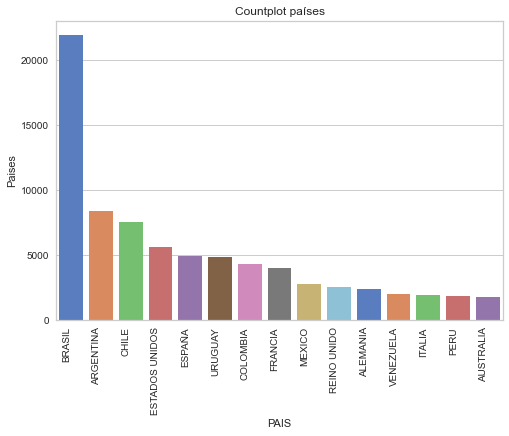

In [80]:
top = dsok5_c0['PAIS'].value_counts().index[0:15]

ax = sns.countplot (dsok5_c0.PAIS, palette = "muted",order=top)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Countplot países")
plt.ylabel('Paises')


plt.show()

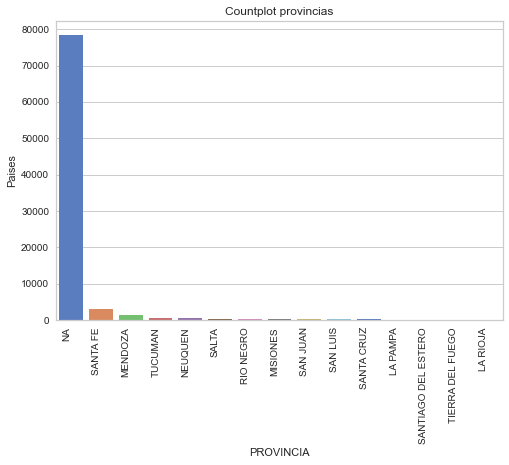

In [81]:
top = dsok5_c0['PROVINCIA'].value_counts().index[0:15]

ax = sns.countplot (dsok5_c0.PROVINCIA, palette = "muted",order=top)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Countplot provincias")
plt.ylabel('Paises')


plt.show()

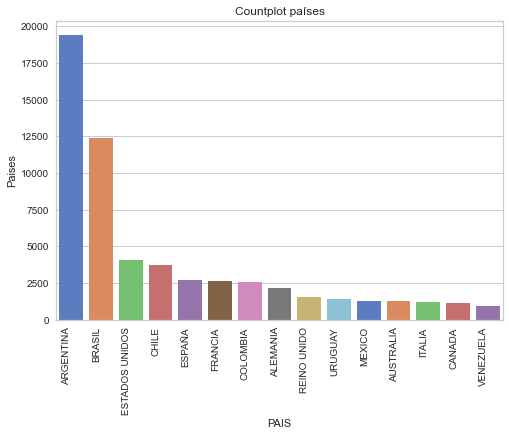

In [82]:
top = dsok5_c1['PAIS'].value_counts().index[0:15]

ax = sns.countplot (dsok5_c1.PAIS, palette = "muted",order=top)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Countplot países")
plt.ylabel('Paises')


plt.show()

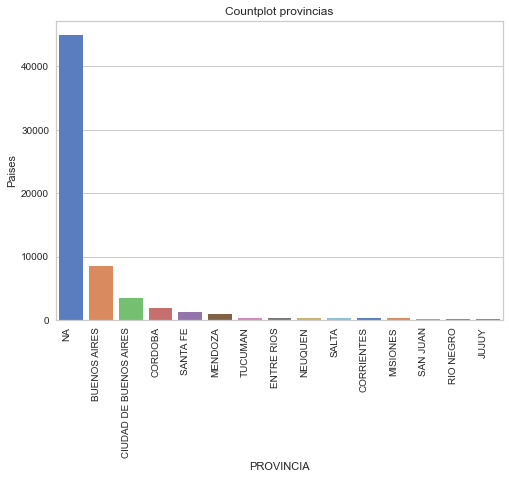

In [83]:
top = dsok5_c1['PROVINCIA'].value_counts().index[0:15]

ax = sns.countplot (dsok5_c1.PROVINCIA, palette = "muted",order=top)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Countplot provincias")
plt.ylabel('Paises')


plt.show()

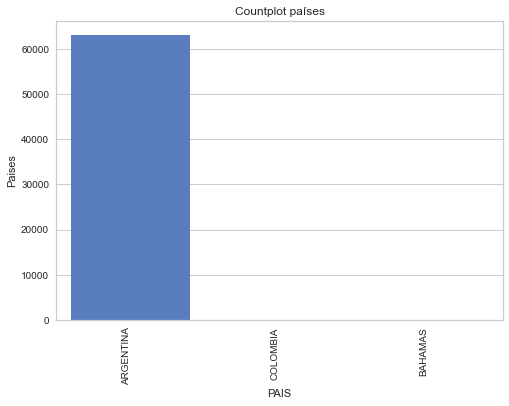

In [84]:
top = dsok5_c2['PAIS'].value_counts().index[0:15]

ax = sns.countplot (dsok5_c2.PAIS, palette = "muted",order=top)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Countplot países")
plt.ylabel('Paises')


plt.show()

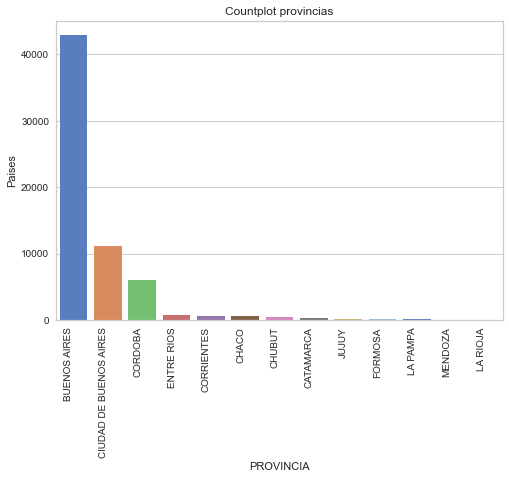

In [85]:
top = dsok5_c2['PROVINCIA'].value_counts().index[0:15]

ax = sns.countplot (dsok5_c2.PROVINCIA, palette = "muted",order=top)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Countplot provincias")
plt.ylabel('Paises')


plt.show()

In [86]:
dsok5_c2.sample(n = 10)

,tipo_cambio_a3500,CAT,PASAJEROS,PERNOCTACIONES,PAIS,PROVINCIA,DIA,MES,CLUSTER
129558,15.6687,FLORIDA,1,3.0,ARGENTINA,BUENOS AIRES,1,3,2
163099,16.8697,HUB,6,3.0,ARGENTINA,BUENOS AIRES,0,7,2
54651,14.8583,FLORIDA,2,10.0,ARGENTINA,CORDOBA,3,7,2
166754,17.4092,PLANETARIO,10,3.0,ARGENTINA,BUENOS AIRES,5,7,2
229648,20.1258,CAMINITO,1,3.0,ARGENTINA,BUENOS AIRES,2,2,2
177921,17.2083,RETIRO,1,0.0,ARGENTINA,BUENOS AIRES,3,9,2
162536,16.9517,FLORIDA,1,3.0,ARGENTINA,BUENOS AIRES,4,7,2
251341,20.6917,FLORIDA,2,3.0,ARGENTINA,BUENOS AIRES,0,4,2
28075,14.4300,CAMINITO,2,6.0,ARGENTINA,BUENOS AIRES,0,4,2
46132,13.7935,CAMINITO,2,2.0,ARGENTINA,CORDOBA,2,6,2


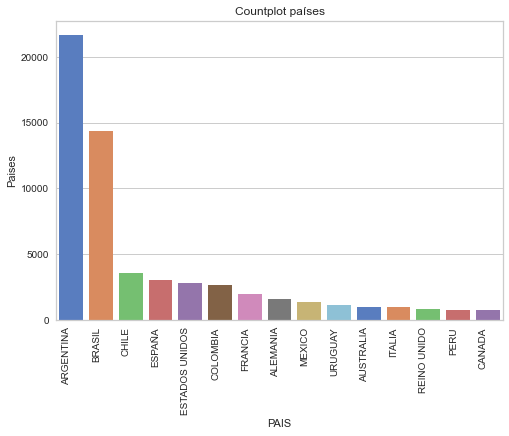

In [87]:
top = dsok5_c3['PAIS'].value_counts().index[0:15]

ax = sns.countplot (dsok5_c3.PAIS, palette = "muted",order=top)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Countplot países")
plt.ylabel('Paises')


plt.show()

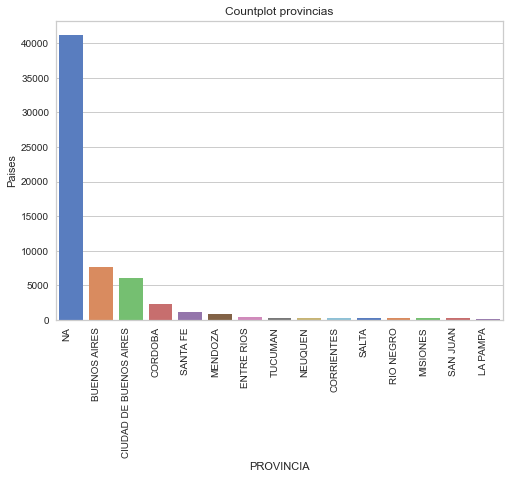

In [88]:
top = dsok5_c3['PROVINCIA'].value_counts().index[0:15]

ax = sns.countplot (dsok5_c3.PROVINCIA, palette = "muted",order=top)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Countplot provincias")
plt.ylabel('Paises')


plt.show()

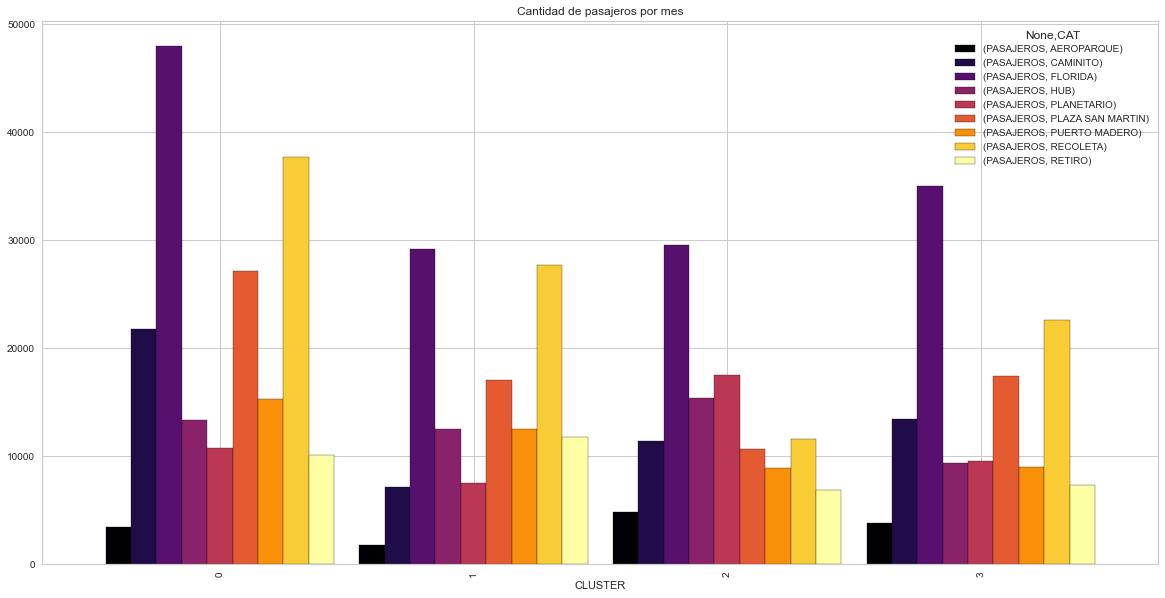

In [89]:
lugar=pd.pivot_table(dsok5, index=['CLUSTER'], columns=['CAT'], values=['PASAJEROS'],aggfunc=np.sum,)
#mama= pd.DataFrame(lugar).transpose()
#PASAJEROS_POR_MES1=PASAJEROS_POR_MES1.sort_values(by=['PASAJEROS'], ascending=False)
lugar2=pd.DataFrame(lugar)

lugar2.plot(kind='bar',  title='Cantidad de pasajeros por mes',figsize=(20,10), colormap='inferno',width=0.9,edgecolor='black')

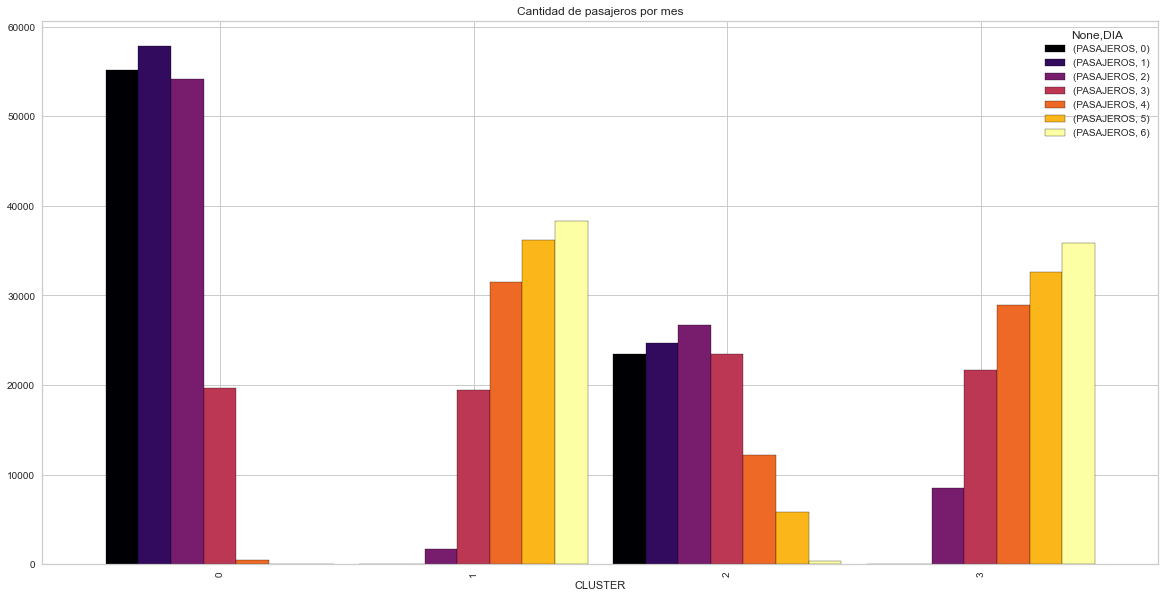

In [90]:
DD=pd.pivot_table(dsok5, index=['CLUSTER'], columns=['DIA'], values=['PASAJEROS'],aggfunc=np.sum)
#mama= pd.DataFrame(lugar).transpose()
#PASAJEROS_POR_MES1=PASAJEROS_POR_MES1.sort_values(by=['PASAJEROS'], ascending=False)
DD2=pd.DataFrame(DD)
DD2.plot(kind='bar',  title='Cantidad de pasajeros por mes',figsize=(20,10), colormap='inferno',width=0.9,edgecolor='black')

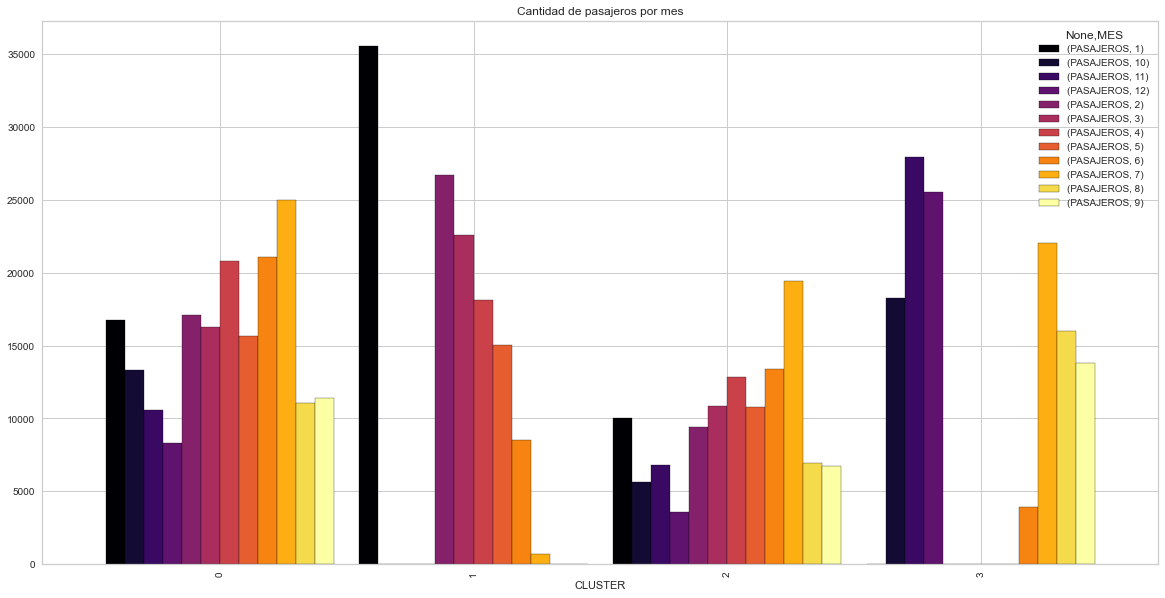

In [91]:
DD=pd.pivot_table(dsok5, index=['CLUSTER'], columns=['MES'], values=['PASAJEROS'],aggfunc=np.sum)
#mama= pd.DataFrame(lugar).transpose()
#DD2=DD2.sort_values(by=['PASAJEROS','MES'], ascending=False)
DD2=pd.DataFrame(DD)
DD2.plot(kind='bar',  title='Cantidad de pasajeros por mes',figsize=(20,10), colormap='inferno',width=0.9,edgecolor='black')

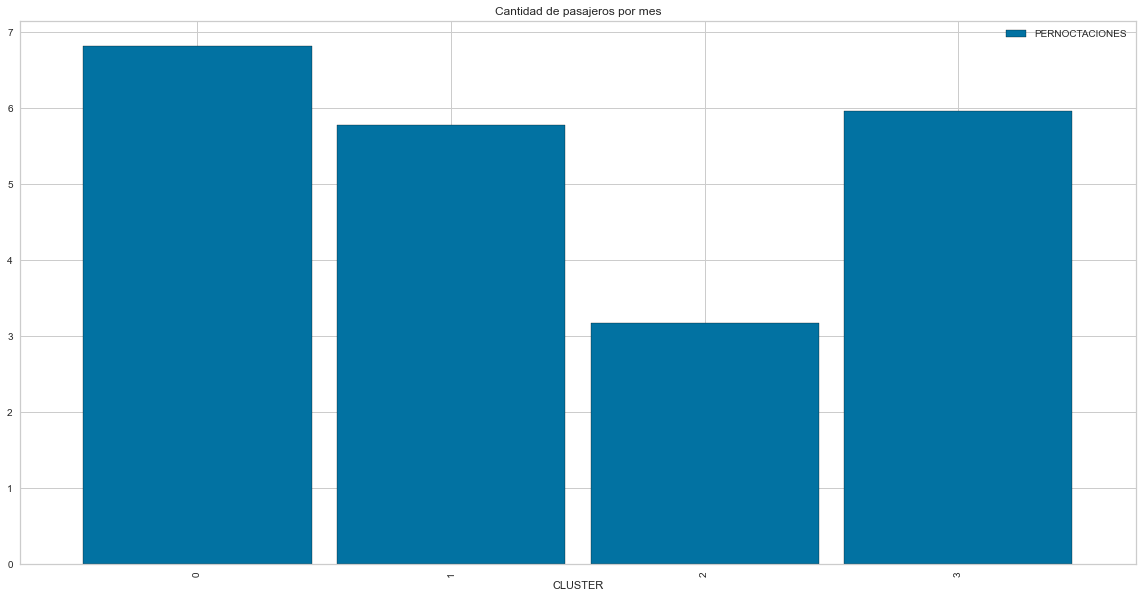

In [92]:
DD=pd.pivot_table(dsok5, index=['CLUSTER'], values=['PERNOCTACIONES'],aggfunc=np.mean)
#mama= pd.DataFrame(lugar).transpose()
#DD2=DD2.sort_values(by=['PASAJEROS','MES'], ascending=False)
DD2=pd.DataFrame(DD)
#DD2.sort_values(['PASAJEROS','MES'], ascending=[True, True])
DD2.plot(kind='bar',  title='Cantidad de pasajeros por mes',figsize=(20,10), width=0.9,edgecolor='black')
plt.show()